In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms ##for type transformations

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix    ##to calculate the accuracy of the model
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
transform = transforms.ToTensor() ##download dataset and transform it to tensor

In [4]:
train_data = datasets.MNIST(root = 'data', train = True, download = True, transform = transform) ##send dataset to data folder
train_data  ##downloading data

100.1%Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw
113.5%Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw
100.4%Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw
180.4%Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw
Processing...
Done!


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data = datasets.MNIST(root = 'data', train = False, download = True, transform = transform)    ##send to data folder
test_data
##60000 train, 10000 test datasets

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data[0]   ##see first data

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
image, label = train_data[0]

In [8]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [9]:
label

5

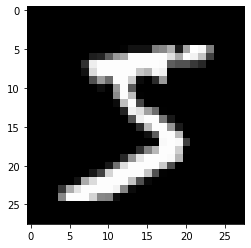

In [10]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap='gray')  ##show image with label '5', gray color

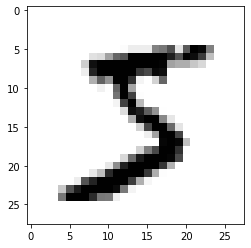

In [11]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap='gist_yarg')  ##show image with label '5', opposite to gray color

In [12]:
##by preprocessing the data with batch_size, we can get a certain number of times
torch.manual_seed(42)   ##the same probabilities will come as the seed value remains constant
train_load = DataLoader(train_data, batch_size = 100, shuffle = True)
test_load = DataLoader(test_data, batch_size = 500, shuffle = False)

Labels [   0    7    7    7    7    6    8    9    0    1    6    8]


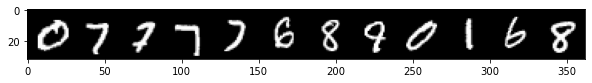

In [14]:
from torchvision.utils import make_grid
np.set_printoptions(formatter = dict(int = lambda x: f'{x:4}'))
for images, labels in train_load:
    break
print('Labels', labels[:12].numpy())

im = make_grid(images[:12],nrow=12)
plt.figure(figsize=(10,4))  ##sizing
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

In [15]:
##create artifical neural network
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz = 784, out_sz = 10, layers = [120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)
        

In [16]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model   ##model created, features are pixels

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
##how many parameters are there in the artifical neural network
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'_______\n{sum(params):>6}')


In [26]:
count_parameters(model)

 94080
   120
 10080
    84
   840
    10
_______
105214


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [29]:
for images, labels in train_load:
    print('Batch shape: ', images.size())
    break

Batch shape:  torch.Size([100, 1, 28, 28])


In [30]:
images.view(100,-1).size()

torch.Size([100, 784])

In [31]:
##train model
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    for b, (X_train, y_train) in enumerate(train_load):
        b+=1

        y_pred = model(X_train.view(100,-1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr+=batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%200 == 0:
            print(f'epoch: {i:2} batch:{b:4} [{100*b:6}/60000] loss: {loss.item():10.8f} accuracy: {trn_corr.item()*100/(100*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_load):
            y_val = model(X_test.view(500,-1))

            predicted = torch.max(y_val.data, 1)[1]
            tst_corr+=(predicted==y_test).sum()
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)


print(f'\nDuration:{time.time()-start_time:.0f} seconds')

epoch:  0 batch: 200 [ 20000/60000] loss: 0.30841392 accuracy:  82.670%
epoch:  0 batch: 400 [ 40000/60000] loss: 0.21501665 accuracy:  87.338%
epoch:  0 batch: 600 [ 60000/60000] loss: 0.26051956 accuracy:  89.523%
epoch:  1 batch: 200 [ 20000/60000] loss: 0.30311814 accuracy:  95.340%
epoch:  1 batch: 400 [ 40000/60000] loss: 0.08107853 accuracy:  95.300%
epoch:  1 batch: 600 [ 60000/60000] loss: 0.10338916 accuracy:  95.452%
epoch:  2 batch: 200 [ 20000/60000] loss: 0.15633121 accuracy:  96.665%
epoch:  2 batch: 400 [ 40000/60000] loss: 0.22044533 accuracy:  96.743%
epoch:  2 batch: 600 [ 60000/60000] loss: 0.18313204 accuracy:  96.768%
epoch:  3 batch: 200 [ 20000/60000] loss: 0.05197399 accuracy:  97.720%
epoch:  3 batch: 400 [ 40000/60000] loss: 0.09719075 accuracy:  97.690%
epoch:  3 batch: 600 [ 60000/60000] loss: 0.08204010 accuracy:  97.637%
epoch:  4 batch: 200 [ 20000/60000] loss: 0.07284516 accuracy:  98.225%
epoch:  4 batch: 400 [ 40000/60000] loss: 0.07836582 accuracy:  

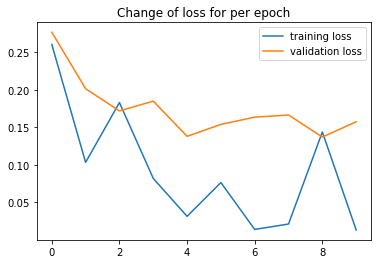

In [33]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Change of loss for per epoch')
plt.legend();

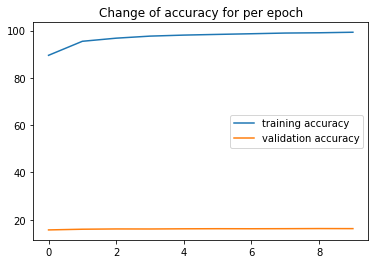

In [35]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/600 for t in test_correct], label='validation accuracy')
plt.title('Change of accuracy for per epoch')
plt.legend();

In [36]:
print(test_correct)

[tensor(9439), tensor(9614), tensor(9684), tensor(9675), tensor(9721), tensor(9745), tensor(9734), tensor(9752), tensor(9781), tensor(9766)]


In [37]:
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%')    ##-1-->last element

Test accuracy: 97.660%


In [38]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [39]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1))
        predicted = torch.max(y_val,1)[1]
        correct+=(predicted==y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)}={correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9766/10000= 97.660%


In [40]:
np.set_printoptions(formatter=dict(int=lambda x:f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 974    0    7    0    3    2    6    1    1    4]
 [   0 1125    4    0    1    0    3    5    2    2]
 [   0    2 1002    3    2    0    1    9    4    0]
 [   1    4    5  997    0   16    1    4   14   12]
 [   0    0    2    0  959    1    1    2    5    7]
 [   0    0    0    1    0  862    4    0    4    5]
 [   1    1    2    0    7    4  940    0    2    0]
 [   0    0    5    5    2    1    0 1001    4    5]
 [   3    3    4    2    0    6    2    0  933    1]
 [   1    0    1    2    8    0    0    6    5  973]]


In [42]:
##prediction falses, misses
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses=np.append(misses, i).astype('int64')

len(misses)

234

In [43]:
misses[:10]

array([ 149,  217,  247,  259,  321,  340,  381,  445,  448,  495],
      dtype=int64)

In [44]:
r = 12
row = iter(np.array_split(misses,len(misses)//r+1))

Index:  [ 149  217  247  259  321  340  381  445  448  495  582  619]
Label:  [   2    6    4    6    2    5    3    6    9    8    8    1]
Guess: [   9    5    6    0    7    3    7    0    3    2    2    8]


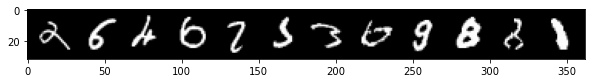

In [45]:
nextrow = next(row)
print('Index: ',nextrow)    #which index
print('Label: ', y_test.index_select(0,torch.tensor(nextrow)).numpy())  ##real number
print('Guess:', predicted.index_select(0,torch.tensor(nextrow)).numpy())    #predicted number

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)));